## How far Gorssel alone can anticipate the flood?

In this part, we explore some of Gorssel levers and evaluate its performance compared to the base case (no-policy) situation.

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import time

In [4]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [5]:
# FUNCTION FOR AGGREGATING THE OUTCOMES OF INTEREST
def aggregate_outcomesA4(results, outcome):
    a4 = "A.4"
    list_outcomes_columns = []

    for i in results.columns:
        if a4 in i:
            if outcome in i:
                list_outcomes_columns.append(i)

    results["Total A.4 " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)

def aggregate_outcomes(results, outcome):
    list_outcomes_columns = []

    for i in results.columns:
          if outcome in i:
                list_outcomes_columns.append(i)

    results["Total " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)
    
def aggregatendisaggregate_outcomes(results, outcome):
    list_outcomes_columns = []
    '''
    aggregating the Room for River or Evacuation costs over planning steps,
    then equally divide it among the regions.
    '''
    for i in results.columns:
          if outcome in i:
                list_outcomes_columns.append(i)

    results["Total A.4" + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)/5

In [6]:
# LOADING THE MODEL WITH PROBLEM FORMULATION 5
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario,
                           ema_logging, perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.samplers import sample_uncertainties

import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(5)

Enlisting outcomes, uncertainties, and levers provided by the model.

In [7]:
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage 0')
ScalarOutcome('A.1_Dike Investment Costs 0')
ScalarOutcome('A.1_Expected Number of Deaths 0')
ScalarOutcome('A.2_Expected Annual Damage 0')
ScalarOutcome('A.2_Dike Investment Costs 0')
ScalarOutcome('A.2_Expected Number of Deaths 0')
ScalarOutcome('A.3_Expected Annual Damage 0')
ScalarOutcome('A.3_Dike Investment Costs 0')
ScalarOutcome('A.3_Expected Number of Deaths 0')
ScalarOutcome('A.4_Expected Annual Damage 0')
ScalarOutcome('A.4_Dike Investment Costs 0')
ScalarOutcome('A.4_Expected Number of Deaths 0')
ScalarOutcome('A.5_Expected Annual Damage 0')
ScalarOutcome('A.5_Dike Investment Costs 0')
ScalarOutcome('A.5_Expected Number of Deaths 0')
ScalarOutcome('RfR Total Costs 0')
ScalarOutcome('Expected Evacuation Costs 0')
ScalarOutcome('A.1_Expected Annual Damage 1')
ScalarOutcome('A.1_Dike Investment Costs 1')
ScalarOutcome('A.1_Expected Number of Deaths 1')
ScalarOutcome('A.2_Expected Annual Damage 1')
ScalarOutcome('A.2_Dike Investment

In [8]:
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [9]:
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

Defining the policies of Gorssel that will be evaluated. According to the list of levers above, there are many different combination of levers Gorssel has in terms of flood protection. But here, only 4 different policies are going to be evaluated because these policies are deemed representative.
1. RfRinGorssel: implementing RfR in dike ring 4 at time 0
2. MassiveDHinGorssel: heightening the dike ring 4 by 1 meter at time 0, 1 and 2.
3. ModerateDHinGorssel: heightening the dike ring 4 by a half meter at time 0, 1 and 2.
4. DHRfRinGorssel: heightening the dike ring 4 by a half meter at time 0, 1 and 2 and implementing RfR at time 0.

In [13]:
nopolicy = [Policy("base case", **{k.name: 0 for k in dike_model.levers})]
RfRinGorssel = [Policy("RfR in Gorssel only", **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, 
                                                  '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, 
                                                    '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                                                    '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 
                                                    '4_RfR 0': 1, '4_RfR 1': 0, '4_RfR 2': 0, 
                                                    'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 
                                                    'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 
                                                    'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                                                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 
                                                    'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 
                                                    'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 
                                                    'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 
                                                    'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})]

MassiveDHinGorssel = [Policy("Massive DH in Gorssel only", **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, 
                                                           '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, 
                                                           '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                                                           '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 
                                                           '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 
                                                           'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 
                                                           'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 
                                                           'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                                                           'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 
                                                           'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 
                                                           'A.4_DikeIncrease 0': 10, 'A.4_DikeIncrease 1': 10, 
                                                           'A.4_DikeIncrease 2': 10, 'A.5_DikeIncrease 0': 0, 
                                                           'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})]
ModerateDHinGorssel = [Policy("Moderate DH in Gorssel only", **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, 
                                                           '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, 
                                                           '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                                                           '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 
                                                           '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 
                                                           'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 
                                                           'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 
                                                           'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                                                           'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 
                                                           'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 
                                                           'A.4_DikeIncrease 0': 5, 'A.4_DikeIncrease 1': 5, 
                                                           'A.4_DikeIncrease 2': 5, 'A.5_DikeIncrease 0': 0, 
                                                           'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0} )]
DHRfRinGorssel = [Policy("RfR+DH in Gorssel only", **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, 
                                                           '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, 
                                                           '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                                                           '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 
                                                           '4_RfR 0': 1, '4_RfR 1': 0, '4_RfR 2': 0, 
                                                           'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 
                                                           'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 
                                                           'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                                                           'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 
                                                           'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 
                                                           'A.4_DikeIncrease 0': 5, 'A.4_DikeIncrease 1': 5, 
                                                           'A.4_DikeIncrease 2': 5, 'A.5_DikeIncrease 0': 0, 
                                                           'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0} )]

Those four policies will be compared to each other and to the base case. To accommodate an easier comparison, we use:
- mean Expected Annual Damage (EAD) to show the severity of the flood risk
- percentage of the zero EAD generated from all random scenarios

Only EAD is used as proxy here because the Expected Number of Deaths is found to be always in line with the EAD.

## No Policy exploration

In [14]:
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments0,outcomes0 = evaluator.perform_experiments(scenarios=1000, policies=nopolicy)


end = time.time()
print("time taken: {} seconds".format((end-start)))


[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 958.7650971412659 seconds


In [15]:
outcomes0 = pd.DataFrame(outcomes0)
outcomes0_ = outcomes0
aggregate_outcomesA4(outcomes0_, "Expected Annual Damage")
aggregate_outcomesA4(outcomes0_, "Expected Number of Deaths")
aggregate_outcomesA4(outcomes0_, "Dike Investment Costs")
aggregate_outcomes(outcomes0_, "RfR Total Costs")
aggregate_outcomes(outcomes0_, "Expected Evacuation Costs")
outcomes0_

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,1.754403e+07,0,0.009484,4.515970e+08,0,0.286582,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,0.0,0.0
1,1.329446e+07,0,0.014194,3.452446e+07,0,0.047321,1.627078e+06,0,0.004362,2.745013e+07,...,4.079915e+07,0,0.043060,0.0,0.0,1.029588e+08,0.052912,0,0.0,0.0
2,1.310538e+07,0,0.013957,8.338441e+07,0,0.110197,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,0.0,0.0
3,1.760939e+07,0,0.009525,2.713942e+08,0,0.177418,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,0.0,0.0
4,0.000000e+00,0,0.000000,2.810630e+07,0,0.038971,1.597247e+06,0,0.004217,1.139805e+07,...,0.000000e+00,0,0.000000,0.0,0.0,4.024694e+07,0.023209,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.660383e+08,0,0.649372,0.000000e+00,0,0.000000,6.767939e+06,0,0.017590,3.513549e+06,...,0.000000e+00,0,0.000000,0.0,0.0,1.240648e+07,0.006849,0,0.0,0.0
996,2.116490e+08,0,0.109547,1.381660e+07,0,0.009762,0.000000e+00,0,0.000000,2.757879e+05,...,1.224400e+06,0,0.001356,0.0,0.0,7.209748e+05,0.000312,0,0.0,0.0
997,2.076483e+08,0,0.107037,0.000000e+00,0,0.000000,5.526823e+08,0,0.706060,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,0.0,0.0
998,0.000000e+00,0,0.000000,8.788743e+06,0,0.010450,4.454346e+06,0,0.010012,4.321400e+06,...,1.001825e+08,0,0.132861,0.0,0.0,1.140729e+07,0.008319,0,0.0,0.0


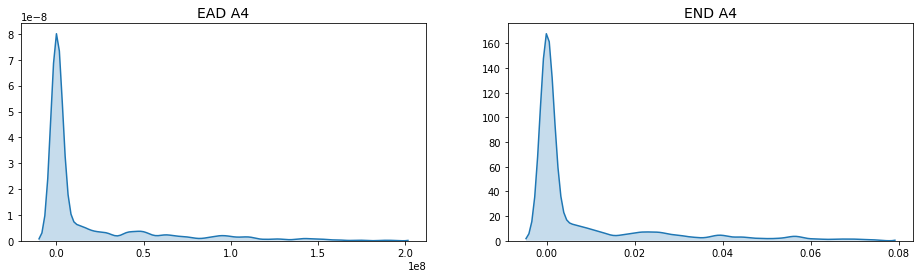

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.set_title('EAD A4', size=14)
ax2.set_title('END A4', size=14)

sns.kdeplot(outcomes0_['Total A.4 Expected Annual Damage'], ax=ax1, shade=True, legend = False)
sns.kdeplot(outcomes0_['Total A.4 Expected Number of Deaths'], ax=ax2, shade=True, legend = False)

plt.show()

### Results:

In [37]:
print(np.percentile(outcomes0_['Total A.4 Expected Annual Damage'],59.5))
print(outcomes0_['Total A.4 Expected Annual Damage'].mean())

0.0
18075051.999764934


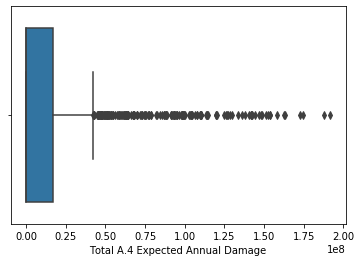

In [34]:
sns.boxplot(x=outcomes0_['Total A.4 Expected Annual Damage'])

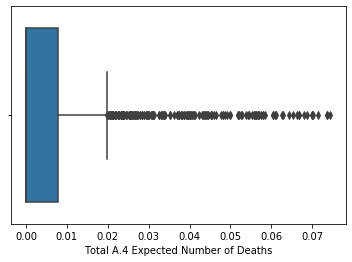

In [19]:
sns.boxplot(x=outcomes0_['Total A.4 Expected Number of Deaths'])

## RfR in Gorssel exploration

In [20]:
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments1,outcomes1 = evaluator.perform_experiments(scenarios=1000, policies=RfRinGorssel)


end = time.time()
print("time taken: {} seconds".format((end-start)))


[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 934.9798004627228 seconds


In [39]:
outcomes1 = pd.DataFrame(outcomes1)

In [40]:
outcomes1_ = outcomes1
aggregate_outcomesA4(outcomes1_, "Expected Annual Damage")
aggregate_outcomesA4(outcomes1_, "Expected Number of Deaths")
aggregate_outcomesA4(outcomes1_, "Dike Investment Costs")
aggregate_outcomes(outcomes1_, "RfR Total Costs")
aggregate_outcomes(outcomes1_, "Expected Evacuation Costs")
outcomes1_

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,6.613961e+08,0,0.643671,0.000000e+00,0,0.000000,6.983799e+07,0,0.173111,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,256100000.0,0.0
1,0.000000e+00,0,0.000000,1.440880e+07,0,0.010590,3.538281e+07,0,0.048051,0.000000e+00,...,3.397796e+07,0,0.030263,0.0,0.0,0.000000e+00,0.000000,0,256100000.0,0.0
2,0.000000e+00,0,0.000000,1.502422e+07,0,0.013995,4.241954e+08,0,0.701786,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,256100000.0,0.0
3,1.653005e+07,0,0.011583,1.099308e+07,0,0.010379,8.296513e+07,0,0.143325,3.540698e+05,...,4.251689e+07,0,0.046216,0.0,0.0,8.674052e+05,0.000541,0,256100000.0,0.0
4,1.319586e+09,0,0.647520,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,256100000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.002614e+08,0,0.637191,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,256100000.0,0.0
996,1.328769e+09,0,0.653188,1.393158e+07,0,0.009923,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,256100000.0,0.0
997,1.219692e+08,0,0.063936,5.527687e+07,0,0.038197,0.000000e+00,0,0.000000,7.022011e+07,...,2.556070e+07,0,0.031551,0.0,0.0,1.487139e+08,0.061808,0,256100000.0,0.0
998,1.326241e+09,0,0.651628,7.461111e+06,0,0.005410,2.691606e+07,0,0.036481,4.631847e+05,...,0.000000e+00,0,0.000000,0.0,0.0,1.053560e+06,0.000549,0,256100000.0,0.0


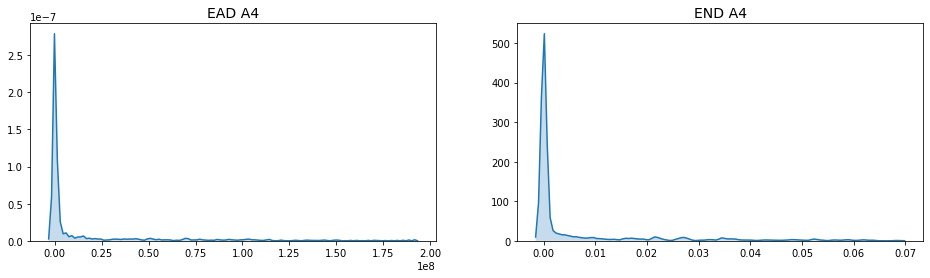

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.set_title('EAD A4', size=14)
ax2.set_title('END A4', size=14)

sns.kdeplot(outcomes1_['Total A.4 Expected Annual Damage'], ax=ax1, shade=True, legend = False)
sns.kdeplot(outcomes1_['Total A.4 Expected Number of Deaths'], ax=ax2, shade=True, legend = False)

plt.show()

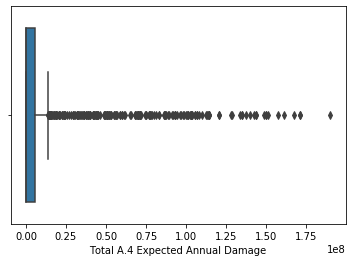

In [42]:
sns.boxplot(x=outcomes1_['Total A.4 Expected Annual Damage'])

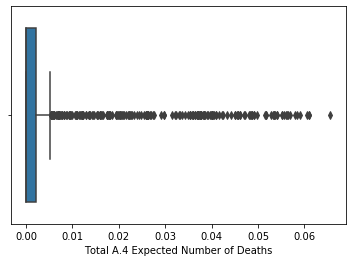

In [65]:
sns.boxplot(x=outcomes1_['Total A.4 Expected Number of Deaths'])

### Results:

In [47]:
print(np.percentile(outcomes1_['Total A.4 Expected Annual Damage'],65.5))
print(outcomes1_['Total A.4 Expected Annual Damage'].mean())
print(outcomes1_['Total A.4 Expected Number of Deaths'].mean())

0.0
13753677.187912542
0.0058909850521129065


## Massive Dike Heightening exploration

In [45]:
#Evaluating Massive Dike Heightening in Gorssel
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments2,outcomes2 = evaluator.perform_experiments(scenarios=1000, policies=MassiveDHinGorssel)


end = time.time()
print("time taken: {} seconds".format((end-start)))


[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 594.6525807380676 seconds


In [58]:
outcomes2 = pd.DataFrame(outcomes2)
outcomes2_ = outcomes2
aggregate_outcomesA4(outcomes2_, "Expected Annual Damage")
aggregate_outcomesA4(outcomes2_, "Expected Number of Deaths")
aggregate_outcomesA4(outcomes2_, "Dike Investment Costs")
aggregate_outcomes(outcomes2_, "RfR Total Costs")
aggregate_outcomes(outcomes2_, "Expected Evacuation Costs")
outcomes2_

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,2.180229e+08,0,0.181052,1.085610e+08,0,0.116728,5.071502e+08,0,1.032213,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0
1,1.174569e+09,0,0.578159,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0
2,1.194840e+08,0,0.100658,0.000000e+00,0,0.000000,2.205684e+08,0,0.464966,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0
3,1.159368e+09,0,0.568783,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,...,3.563781e+06,0,0.002237,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0
4,1.783497e+07,0,0.019059,1.786158e+07,0,0.025081,1.825678e+08,0,0.472048,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000e+00,0,0.000000,5.954641e+07,0,0.053146,6.386817e+08,0,1.037453,0.0,...,1.734767e+08,0,0.204246,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0
996,2.282724e+08,0,0.152171,1.082390e+07,0,0.009587,6.481616e+08,0,1.060790,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0
997,9.136280e+08,0,0.584575,4.796441e+07,0,0.038584,2.416869e+08,0,0.378043,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0
998,2.587567e+07,0,0.017888,1.822473e+07,0,0.016746,4.990260e+07,0,0.086189,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,8.882453e+07,0.0,0.0


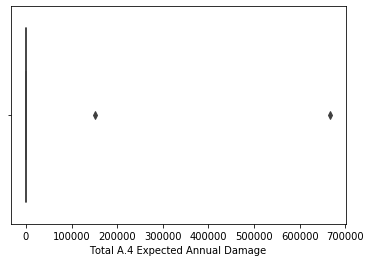

In [62]:
ax1 = sns.boxplot(x=outcomes2_['Total A.4 Expected Annual Damage'])

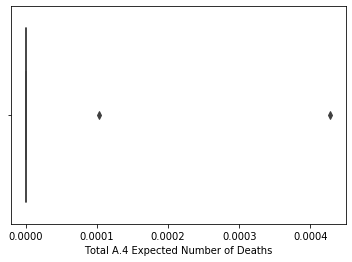

In [63]:
ax1 = sns.boxplot(x=outcomes2_['Total A.4 Expected Number of Deaths'])

### Results:

In [74]:
np.percentile(outcomes2_['Total A.4 Expected Annual Damage'],99.7)

0.0

In [165]:
outcomes2_['Total A.4 Expected Annual Damage'].mean()

818.995437125589

In [77]:
np.percentile(outcomes2_['Total A.4 Expected Number of Deaths'],99.7)

0.0

## Moderate Dike Heightening exploration

In [46]:
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments3,outcomes3 = evaluator.perform_experiments(scenarios=1000, policies=ModerateDHinGorssel)


end = time.time()
print("time taken: {} seconds".format((end-start)))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 600.4773268699646 seconds


In [86]:
outcomes3 = pd.DataFrame(outcomes3)
outcomes3_ = outcomes3
aggregate_outcomesA4(outcomes3_, "Expected Annual Damage")
aggregate_outcomesA4(outcomes3_, "Expected Number of Deaths")
aggregate_outcomesA4(outcomes3_, "Dike Investment Costs")
aggregate_outcomes(outcomes3_, "RfR Total Costs")
aggregate_outcomes(outcomes3_, "Expected Evacuation Costs")
outcomes3_

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,7.230545e+08,0,0.579756,5.341624e+05,0,0.000641,2.793548e+07,0,0.061166,0.0,...,4.662696e+07,0,0.031338,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0
1,1.181302e+09,0,0.582311,0.000000e+00,0,0.000000,1.089813e+07,0,0.014408,0.0,...,3.063877e+07,0,0.039906,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0
2,9.085452e+08,0,0.580509,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0
3,7.373064e+08,0,0.475385,1.832108e+06,0,0.001721,6.341215e+08,0,1.026472,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0
4,2.623693e+06,0,0.001865,4.926528e+07,0,0.044457,2.770971e+08,0,0.465577,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.765514e+07,0,0.041000,8.468797e+05,0,0.000609,0.000000e+00,0,0.000000,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0
996,7.024212e+06,0,0.004963,7.803872e+06,0,0.007448,3.540634e+07,0,0.062243,0.0,...,2.139353e+06,0,0.002393,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0
997,8.913321e+08,0,0.566731,0.000000e+00,0,0.000000,5.700965e+06,0,0.010041,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0
998,7.474736e+06,0,0.008082,7.609847e+06,0,0.011037,2.799262e+06,0,0.007617,0.0,...,3.532627e+06,0,0.003165,0.0,0.0,0.0,0.0,3.965139e+07,0.0,0.0


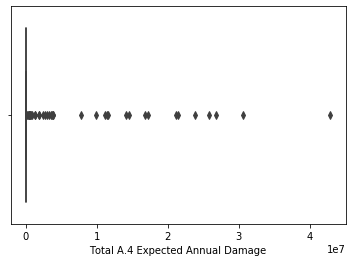

In [87]:
sns.boxplot(x=outcomes3_['Total A.4 Expected Annual Damage'])

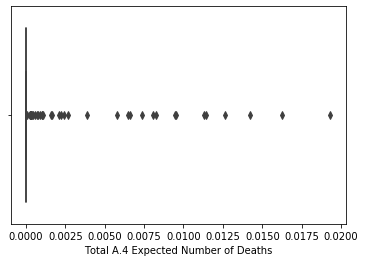

In [88]:
sns.boxplot(x=outcomes3_['Total A.4 Expected Number of Deaths'])

### Results:

In [101]:
np.percentile(outcomes3_['Total A.4 Expected Annual Damage'],96.2)

0.0

In [164]:
outcomes3_['Total A.4 Expected Annual Damage'].mean()

343771.54937454575

In [100]:
np.percentile(outcomes3_['Total A.4 Expected Number of Deaths'],96.2)

0.0

## Moderate Dike Heightening + RfR exploration

In [47]:
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments4,outcomes4 = evaluator.perform_experiments(scenarios=1000, policies=DHRfRinGorssel)


end = time.time()
print("time taken: {} seconds".format((end-start)))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 609.5803713798523 seconds


In [102]:
outcomes4 = pd.DataFrame(outcomes4)
outcomes4_ = outcomes4
aggregate_outcomesA4(outcomes4_, "Expected Annual Damage")
aggregate_outcomesA4(outcomes4_, "Expected Number of Deaths")
aggregate_outcomesA4(outcomes4_, "Dike Investment Costs")
aggregate_outcomes(outcomes4_, "RfR Total Costs")
aggregate_outcomes(outcomes4_, "Expected Evacuation Costs")
outcomes4_

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,9.082437e+08,0,0.580267,6.404948e+05,0,0.000587,5.603760e+06,0,0.009734,0.0,...,1.769777e+08,0,0.216133,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0
1,0.000000e+00,0,0.000000,2.398566e+07,0,0.017233,3.692987e+06,0,0.005054,0.0,...,3.073826e+08,0,0.260013,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0
2,1.136698e+08,0,0.077119,7.460125e+06,0,0.006825,1.154682e+08,0,0.196977,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0
3,2.214031e+07,0,0.012013,2.456517e+08,0,0.162808,1.841828e+08,0,0.238076,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0
4,8.196988e+07,0,0.084455,5.937567e+07,0,0.079312,2.831321e+06,0,0.007474,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.906500e+07,0,0.042404,4.311814e+06,0,0.005093,0.000000e+00,0,0.000000,0.0,...,5.051370e+08,0,0.325210,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0
996,7.200411e+08,0,0.576730,5.052299e+07,0,0.054168,0.000000e+00,0,0.000000,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0
997,0.000000e+00,0,0.000000,2.484302e+06,0,0.003036,2.839218e+07,0,0.062977,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0
998,2.510765e+07,0,0.026509,2.014104e+08,0,0.254611,0.000000e+00,0,0.000000,0.0,...,0.000000e+00,0,0.000000,0.0,0.0,0.0,0.0,3.965139e+07,256100000.0,0.0


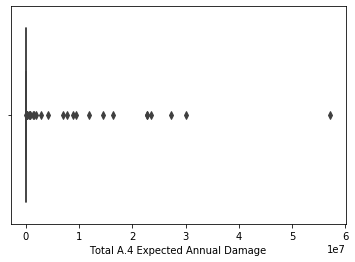

In [104]:
sns.boxplot(x=outcomes4_['Total A.4 Expected Annual Damage'])

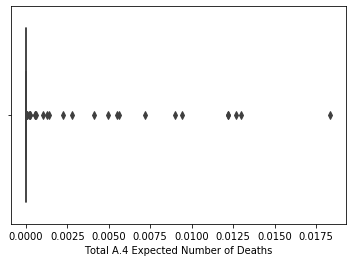

In [103]:
sns.boxplot(x=outcomes4_['Total A.4 Expected Number of Deaths'])

### Results:

In [112]:
np.percentile(outcomes4_['Total A.4 Expected Annual Damage'],97.3)

0.0

In [163]:
outcomes4_['Total A.4 Expected Annual Damage'].mean()

273417.3875393287

In [113]:
np.percentile(outcomes4_['Total A.4 Expected Number of Deaths'],97.3)

0.0

# The effect of RfR in upstream regions

It might be also useful for Gorssel to know whether the implementation of RfR in the upstream region (dike ring 1-3) gives benefit for Gorssel’s flood protection. These are the expected annual damage and expected casualties when RfR is implemented in Dike Ring 1, 2, or 3.

The same parameters as the previous exploration will be used to accommodate an easier comparison.
- mean Expected Annual Damage (EAD) to show the severity of the flood risk
- percentage of the zero EAD generated from all random scenarios


Defining the policies.

In [114]:
RfRin1 = [Policy("RfR in Dike 1", **{'0_RfR 0': 1, '0_RfR 1': 0, '0_RfR 2': 0, 
                                                           '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, 
                                                           '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                                                           '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 
                                                           '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 
                                                           'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 
                                                           'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 
                                                           'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                                                           'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 
                                                           'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 
                                                           'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 
                                                           'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 
                                                           'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0} )]
RfRin2 = [Policy("RfR in Dike 2", **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, 
                                                           '1_RfR 0': 1, '1_RfR 1': 0, '1_RfR 2': 0, 
                                                           '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                                                           '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 
                                                           '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 
                                                           'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 
                                                           'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 
                                                           'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                                                           'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 
                                                           'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 
                                                           'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 
                                                           'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 
                                                           'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0} )]
RfRin3 = [Policy("RfR in DIke 3", **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, 
                                                           '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, 
                                                           '2_RfR 0': 1, '2_RfR 1': 0, '2_RfR 2': 0, 
                                                           '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, 
                                                           '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 
                                                           'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 
                                                           'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 
                                                           'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                                                           'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 
                                                           'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 
                                                           'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 
                                                           'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 
                                                           'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0} )]

## RfR in Dike Ring 1 exploration

In [115]:
#Evaluating RfR in Dike 1 effect to Gorssel
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments5,outcomes5 = evaluator.perform_experiments(scenarios=1000, policies=RfRin1)


end = time.time()
print("time taken: {} seconds".format((end-start)))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 1187.4575741291046 seconds


In [118]:
outcomes5 = pd.DataFrame(outcomes5)
outcomes5_ = outcomes5
aggregate_outcomesA4(outcomes5_, "Expected Annual Damage")
aggregate_outcomesA4(outcomes5_, "Expected Number of Deaths")
aggregate_outcomesA4(outcomes5_, "Dike Investment Costs")
aggregate_outcomes(outcomes5_, "RfR Total Costs")
aggregate_outcomes(outcomes5_, "Expected Evacuation Costs")
outcomes5_

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,0.000000e+00,0,0.000000,3.897908e+07,0,0.053330,1.793078e+08,0,0.459198,0.000000e+00,...,3.139250e+08,0,0.250021,0.0,0.0,0.000000e+00,0.000000,0,84600000.0,0.0
1,0.000000e+00,0,0.000000,3.149883e+08,0,0.262892,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,84600000.0,0.0
2,1.090496e+08,0,0.067807,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,...,2.997789e+06,0,0.003290,0.0,0.0,0.000000e+00,0.000000,0,84600000.0,0.0
3,1.374011e+06,0,0.001130,2.480740e+08,0,0.258433,0.000000e+00,0,0.000000,6.092046e+04,...,0.000000e+00,0,0.000000,0.0,0.0,1.608129e+05,0.000085,0,84600000.0,0.0
4,0.000000e+00,0,0.000000,7.524635e+06,0,0.010800,4.184957e+08,0,1.043025,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,84600000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000e+00,0,0.000000,1.197168e+08,0,0.081479,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,84600000.0,0.0
996,0.000000e+00,0,0.000000,6.389803e+07,0,0.044458,1.160274e+07,0,0.015641,5.578701e+06,...,2.525866e+08,0,0.318976,0.0,0.0,1.181471e+07,0.005850,0,84600000.0,0.0
997,6.474956e+08,0,0.503971,2.430843e+06,0,0.002915,1.173417e+07,0,0.026132,0.000000e+00,...,3.346204e+07,0,0.045178,0.0,0.0,0.000000e+00,0.000000,0,84600000.0,0.0
998,0.000000e+00,0,0.000000,1.169786e+07,0,0.011122,4.499181e+06,0,0.007994,1.738598e+07,...,1.408019e+07,0,0.015399,0.0,0.0,4.508749e+07,0.024280,0,84600000.0,0.0


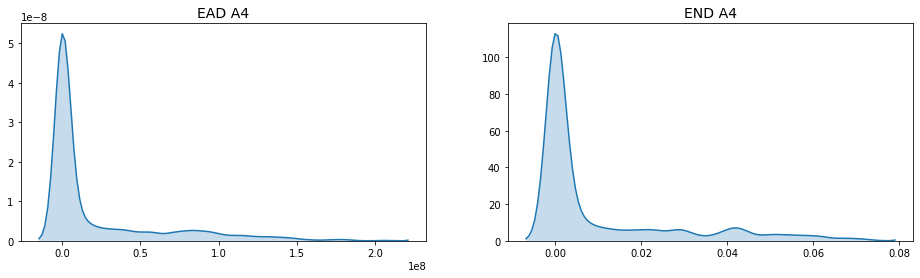

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.set_title('EAD A4', size=14)
ax2.set_title('END A4', size=14)

sns.kdeplot(outcomes5_['Total A.4 Expected Annual Damage'], ax=ax1, shade=True, legend = False)
sns.kdeplot(outcomes5_['Total A.4 Expected Number of Deaths'], ax=ax2, shade=True, legend = False)

plt.show()

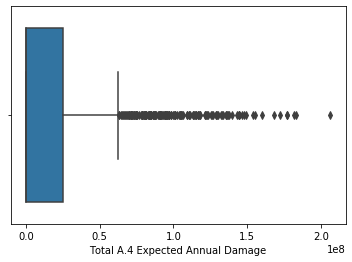

In [123]:
sns.boxplot(x=outcomes5_['Total A.4 Expected Annual Damage'])

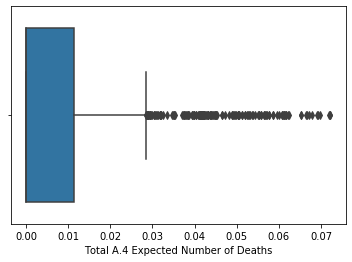

In [122]:
sns.boxplot(x=outcomes5_['Total A.4 Expected Number of Deaths'])

### Results:

In [134]:
np.percentile(outcomes5_['Total A.4 Expected Annual Damage'],51)

0.0

In [159]:
outcomes5_['Total A.4 Expected Annual Damage'].mean()

21386705.1800992

In [160]:
outcomes5_['Total A.4 Expected Number of Deaths'].mean()

0.009747612905934854

## RfR in Dike Ring 2 exploration

In [116]:
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments6,outcomes6 = evaluator.perform_experiments(scenarios=1000, policies=RfRin2)


end = time.time()
print("time taken: {} seconds".format((end-start)))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 1270.1312355995178 seconds


In [120]:
outcomes6 = pd.DataFrame(outcomes6)
outcomes6_ = outcomes6
aggregate_outcomesA4(outcomes6_, "Expected Annual Damage")
aggregate_outcomesA4(outcomes6_, "Expected Number of Deaths")
aggregate_outcomesA4(outcomes6_, "Dike Investment Costs")
aggregate_outcomes(outcomes6_, "RfR Total Costs")
aggregate_outcomes(outcomes6_, "Expected Evacuation Costs")
outcomes6_

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,0.000000e+00,0,0.000000,4.730101e+07,0,0.052908,2.303117e+07,0,0.049701,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,217800000.0,0.0
1,0.000000e+00,0,0.000000,1.170274e+07,0,0.011131,2.808600e+08,0,0.475856,1.932903e+06,...,0.000000e+00,0,0.000000,0.0,0.0,4.457859e+06,0.002532,0,217800000.0,0.0
2,0.000000e+00,0,0.000000,1.824560e+07,0,0.013287,5.564191e+06,0,0.007630,0.000000e+00,...,2.879915e+08,0,0.191248,0.0,0.0,0.000000e+00,0.000000,0,217800000.0,0.0
3,0.000000e+00,0,0.000000,1.775390e+07,0,0.024782,1.785346e+08,0,0.456471,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,217800000.0,0.0
4,0.000000e+00,0,0.000000,6.029883e+07,0,0.081502,1.747284e+08,0,0.445009,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,217800000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000e+00,0,0.000000,4.925833e+07,0,0.044446,0.000000e+00,0,0.000000,0.000000e+00,...,1.741258e+07,0,0.015011,0.0,0.0,0.000000e+00,0.000000,0,217800000.0,0.0
996,0.000000e+00,0,0.000000,1.014272e+07,0,0.007478,4.590406e+07,0,0.062199,2.441683e+05,...,1.186962e+08,0,0.128906,0.0,0.0,5.441227e+05,0.000300,0,217800000.0,0.0
997,0.000000e+00,0,0.000000,3.955082e+07,0,0.045052,1.442691e+08,0,0.307340,3.631970e+07,...,0.000000e+00,0,0.000000,0.0,0.0,1.252266e+08,0.058130,0,217800000.0,0.0
998,3.914040e+07,0,0.037360,9.055367e+07,0,0.119879,0.000000e+00,0,0.000000,8.630421e+04,...,0.000000e+00,0,0.000000,0.0,0.0,3.629498e+05,0.000173,0,217800000.0,0.0


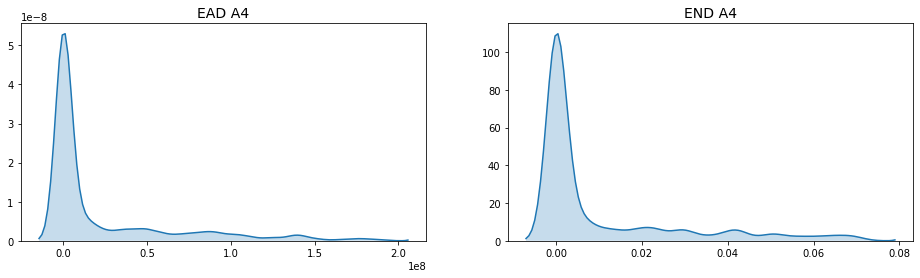

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.set_title('EAD A4', size=14)
ax2.set_title('END A4', size=14)

sns.kdeplot(outcomes6_['Total A.4 Expected Annual Damage'], ax=ax1, shade=True, legend = False)
sns.kdeplot(outcomes6_['Total A.4 Expected Number of Deaths'], ax=ax2, shade=True, legend = False)

plt.show()

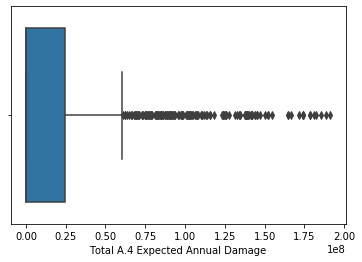

In [127]:
sns.boxplot(x=outcomes6_['Total A.4 Expected Annual Damage'])

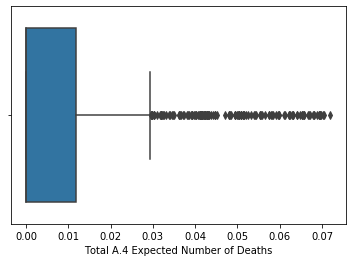

In [130]:
sns.boxplot(x=outcomes6_['Total A.4 Expected Number of Deaths'])

### Results:

In [146]:
np.percentile(outcomes6_['Total A.4 Expected Annual Damage'],55)

0.0

In [161]:
outcomes6_['Total A.4 Expected Annual Damage'].mean()

21932940.95985552

## RfR in Dike Ring 3 exploration

In [117]:
#Evaluating RfR in Dike 3 effect to Gorssel
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments7,outcomes7 = evaluator.perform_experiments(scenarios=1000, policies=RfRin3)


end = time.time()
print("time taken: {} seconds".format((end-start)))

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


time taken: 1189.867117881775 seconds


In [121]:
outcomes7 = pd.DataFrame(outcomes7)
outcomes7_ = outcomes7
aggregate_outcomesA4(outcomes7_, "Expected Annual Damage")
aggregate_outcomesA4(outcomes7_, "Expected Number of Deaths")
aggregate_outcomesA4(outcomes7_, "Dike Investment Costs")
aggregate_outcomes(outcomes7_, "RfR Total Costs")
aggregate_outcomes(outcomes7_, "Expected Evacuation Costs")
outcomes7_

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,3.191569e+07,0,0.027836,2.815120e+07,0,0.031774,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,30700000.0,0.0
1,1.147709e+08,0,0.060392,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,...,2.179556e+08,0,0.187297,0.0,0.0,0.000000e+00,0.000000,0,30700000.0,0.0
2,1.971432e+08,0,0.102304,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,5.348405e+07,...,0.000000e+00,0,0.000000,0.0,0.0,1.073519e+08,0.053290,0,30700000.0,0.0
3,2.666199e+07,0,0.018532,3.985101e+07,0,0.035490,4.364573e+06,0,0.007568,1.801090e+06,...,1.438027e+08,0,0.123967,0.0,0.0,4.778564e+06,0.002668,0,30700000.0,0.0
4,0.000000e+00,0,0.000000,1.169704e+08,0,0.149967,0.000000e+00,0,0.000000,1.174761e+06,...,0.000000e+00,0,0.000000,0.0,0.0,4.940423e+06,0.002330,0,30700000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.090182e+08,0,0.580887,3.682290e+07,0,0.031514,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,30700000.0,0.0
996,5.361387e+08,0,0.271409,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,30700000.0,0.0
997,0.000000e+00,0,0.000000,7.495080e+06,0,0.010718,1.030294e+07,0,0.027381,0.000000e+00,...,0.000000e+00,0,0.000000,0.0,0.0,0.000000e+00,0.000000,0,30700000.0,0.0
998,7.277595e+08,0,0.584482,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,...,5.076133e+06,0,0.003341,0.0,0.0,0.000000e+00,0.000000,0,30700000.0,0.0


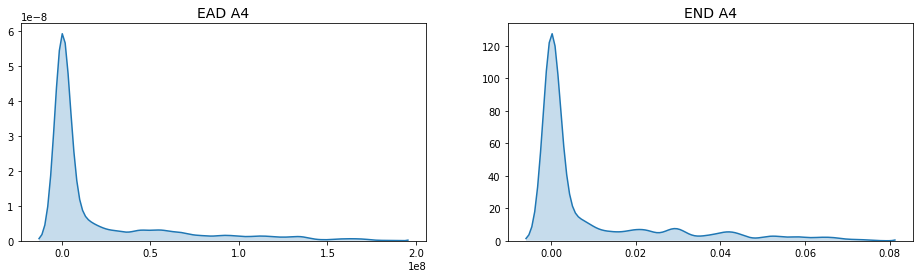

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.set_title('EAD A4', size=14)
ax2.set_title('END A4', size=14)

sns.kdeplot(outcomes7_['Total A.4 Expected Annual Damage'], ax=ax1, shade=True, legend = False)
sns.kdeplot(outcomes7_['Total A.4 Expected Number of Deaths'], ax=ax2, shade=True, legend = False)

plt.show()

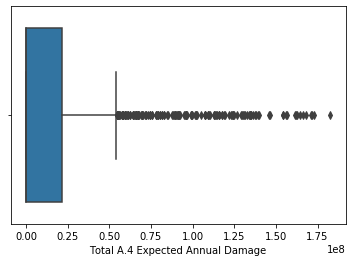

In [128]:
sns.boxplot(x=outcomes7_['Total A.4 Expected Annual Damage'])

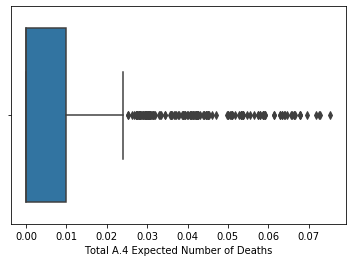

In [129]:
sns.boxplot(x=outcomes7_['Total A.4 Expected Number of Deaths'])

### Results:

In [154]:
np.percentile(outcomes7_['Total A.4 Expected Annual Damage'],52)

0.0

In [162]:
outcomes7_['Total A.4 Expected Annual Damage'].mean()

20135524.358721357

In [157]:
np.percentile(outcomes7_['Total A.4 Expected Number of Deaths'],52)

0.0

## Summary

##### Base case: 61 percentile, mean EAD: 17,903,802


### Comparing the performance of Gorssel's levers

#### Safety

1. RfR at time 0: 67 percentile, mean EAD: 13,599,593
2. Massive Dike Heightening: 99.7 percentile, mean EAD: 818
3. Moderate Dike Heightening: 96.2 percentile, mean EAD: 343,771
4. Dike Heightening + RfR: 97.3 percentile, mean EAD: 273,417

#### Cost

1. RfR: 256,100,000
2. Massive Dike Heightening: 88,824,530
3. Moderate Dike Heightening: 39,651,390
4. Moderate Dike Heightening + RfR: 39,651,390 + 256,100,000 = 295,751,390

### When other region implements RfR

#### Safety
1. RfR at Dike Ring 1: 51 percentile, mean EAD: 21,386,705
2. RfR at Dike Ring 2: 55 percentile, mean EAD: 21,932,940
3. RfR at Dike Ring 3: 52 percentile, mean EAD: 20,135,524

## Conclusion:
- Upstream region's RfR might negatively affect Gorssel. It increases the likelihood of flood in Gorssel.
- Implementing Dike Heightening as a flood protection measure in and for Gorssel might be better than RfR, as it gives much better safety and requires much lower cost.
- Having moderate dike increase (15 dm) might be better than the massive one (30 dm). Massive dike increase is more expensive (and requires more land use) while has worse severity once occurs.
- Combining Moderate Dike Heightening and RfR though might increase safety, the increase is insignificant compared to the additional cost.